In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score , classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

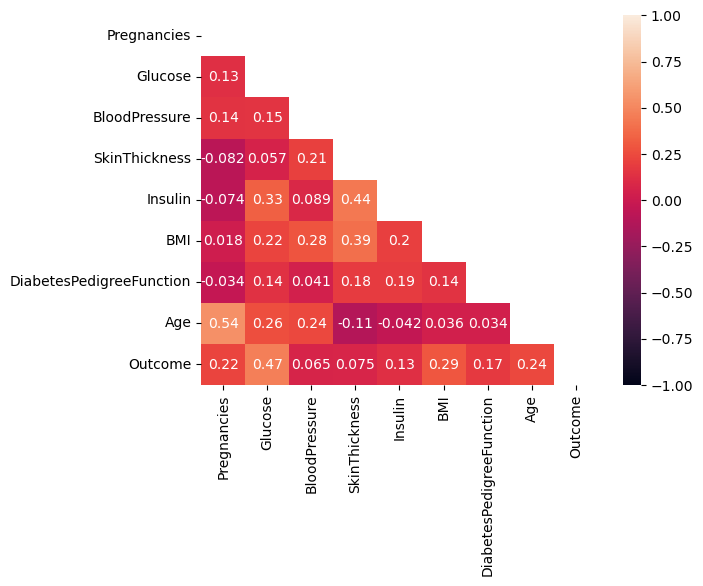

In [9]:
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr() , annot = True , vmin = -1 , vmax = 1 , mask = mask)

In [11]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [12]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

<AxesSubplot:xlabel='Age', ylabel='Count'>

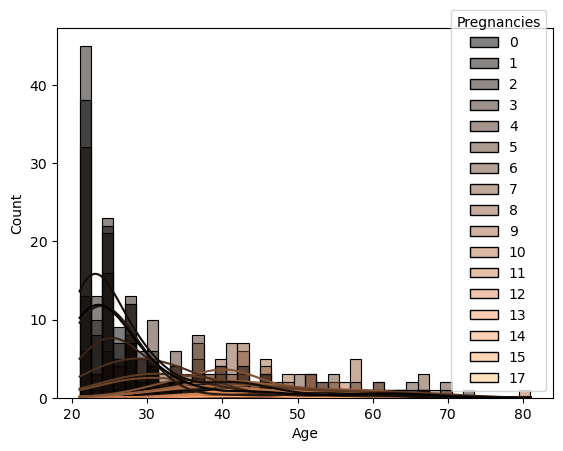

In [23]:
# age and pregnancies are stringly corelated
sns.histplot(data = df , x = 'Age' , hue = 'Pregnancies' , bins=40 , kde = True , palette='copper') 

In [24]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [25]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [29]:
X  

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [30]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### 1. Train Test Split

In [32]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state=42)

In [33]:
X_train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
464           10      115             98              0        0  24.0   
223            7      142             60             33      190  28.8   
393            4      116             72             12       87  22.1   
766            1      126             60              0        0  30.1   
570            3       78             70              0        0  32.5   
..           ...      ...            ...            ...      ...   ...   
71             5      139             64             35      140  28.6   
106            1       96            122              0        0  22.4   
270           10      101             86             37        0  45.6   
435            0      141              0              0        0  42.4   
102            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  
464                     1.022   34  
223                     0.687   61  
393                     0.463   37  
766                     0.349   47  
570                     0.270   39  
..                        ...  ...  
71                      0.411   26  
106                     0.207   27  
270                     1.136   38  
435                     0.205   29  
102                     0.262   21  

[514 rows x 8 columns]

In [34]:
X_test

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   
324            2      112             75             32        0  35.7   
624            2      108             64              0        0  30.8   
690            8      107             80              0        0  24.6   
473            7      136             90              0        0  29.9   
..           ...      ...            ...            ...      ...   ...   
311            0      106             70             37      148  39.4   
429            1       95             82             25      180  35.0   
182            1        0             74             20       23  27.7   
586            8      143             66              0        0  34.9   
679            2      101             58             17      265  24.2   

     DiabetesPedigreeFunction  Age  
668                     0.430   43  
324                     0.148   21  
624                     0.158   21  
690                     0.856   34  
473                     0.210   50  
..                        ...  ...  
311                     0.605   22  
429                     0.233   43  
182                     0.299   21  
586                     0.129   41  
679                     0.614   23  

[254 rows x 8 columns]

In [35]:
y_train

464    0
223    0
393    0
766    1
570    0
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 514, dtype: int64

In [36]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
311    0
429    1
182    0
586    1
679    0
Name: Outcome, Length: 254, dtype: int64

### 2. Making Model

In [39]:
treeclassifier = DecisionTreeClassifier()
treeclassifier.fit(X_train , y_train)

DecisionTreeClassifier()

### 3. Making Tree

[Text(0.6173555107526881, 0.9615384615384616, 'X[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.3395497311827957, 0.8846153846153846, 'X[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.20161290322580644, 0.8076923076923077, 'X[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.12903225806451613, 0.7307692307692307, 'X[5] <= 45.45\ngini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.11827956989247312, 0.6538461538461539, 'X[0] <= 6.5\ngini = 0.13\nsamples = 200\nvalue = [186, 14]'),
 Text(0.10752688172043011, 0.5769230769230769, 'X[1] <= 104.5\ngini = 0.122\nsamples = 199\nvalue = [186, 13]'),
 Text(0.043010752688172046, 0.5, 'X[4] <= 156.0\ngini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(0.021505376344086023, 0.4230769230769231, 'X[3] <= 41.0\ngini = 0.019\nsamples = 104\nvalue = [103, 1]'),
 Text(0.010752688172043012, 0.34615384615384615, 'gini = 0.0\nsamples = 97\nvalue = [97, 0]'),
 Text(0.03225806451612

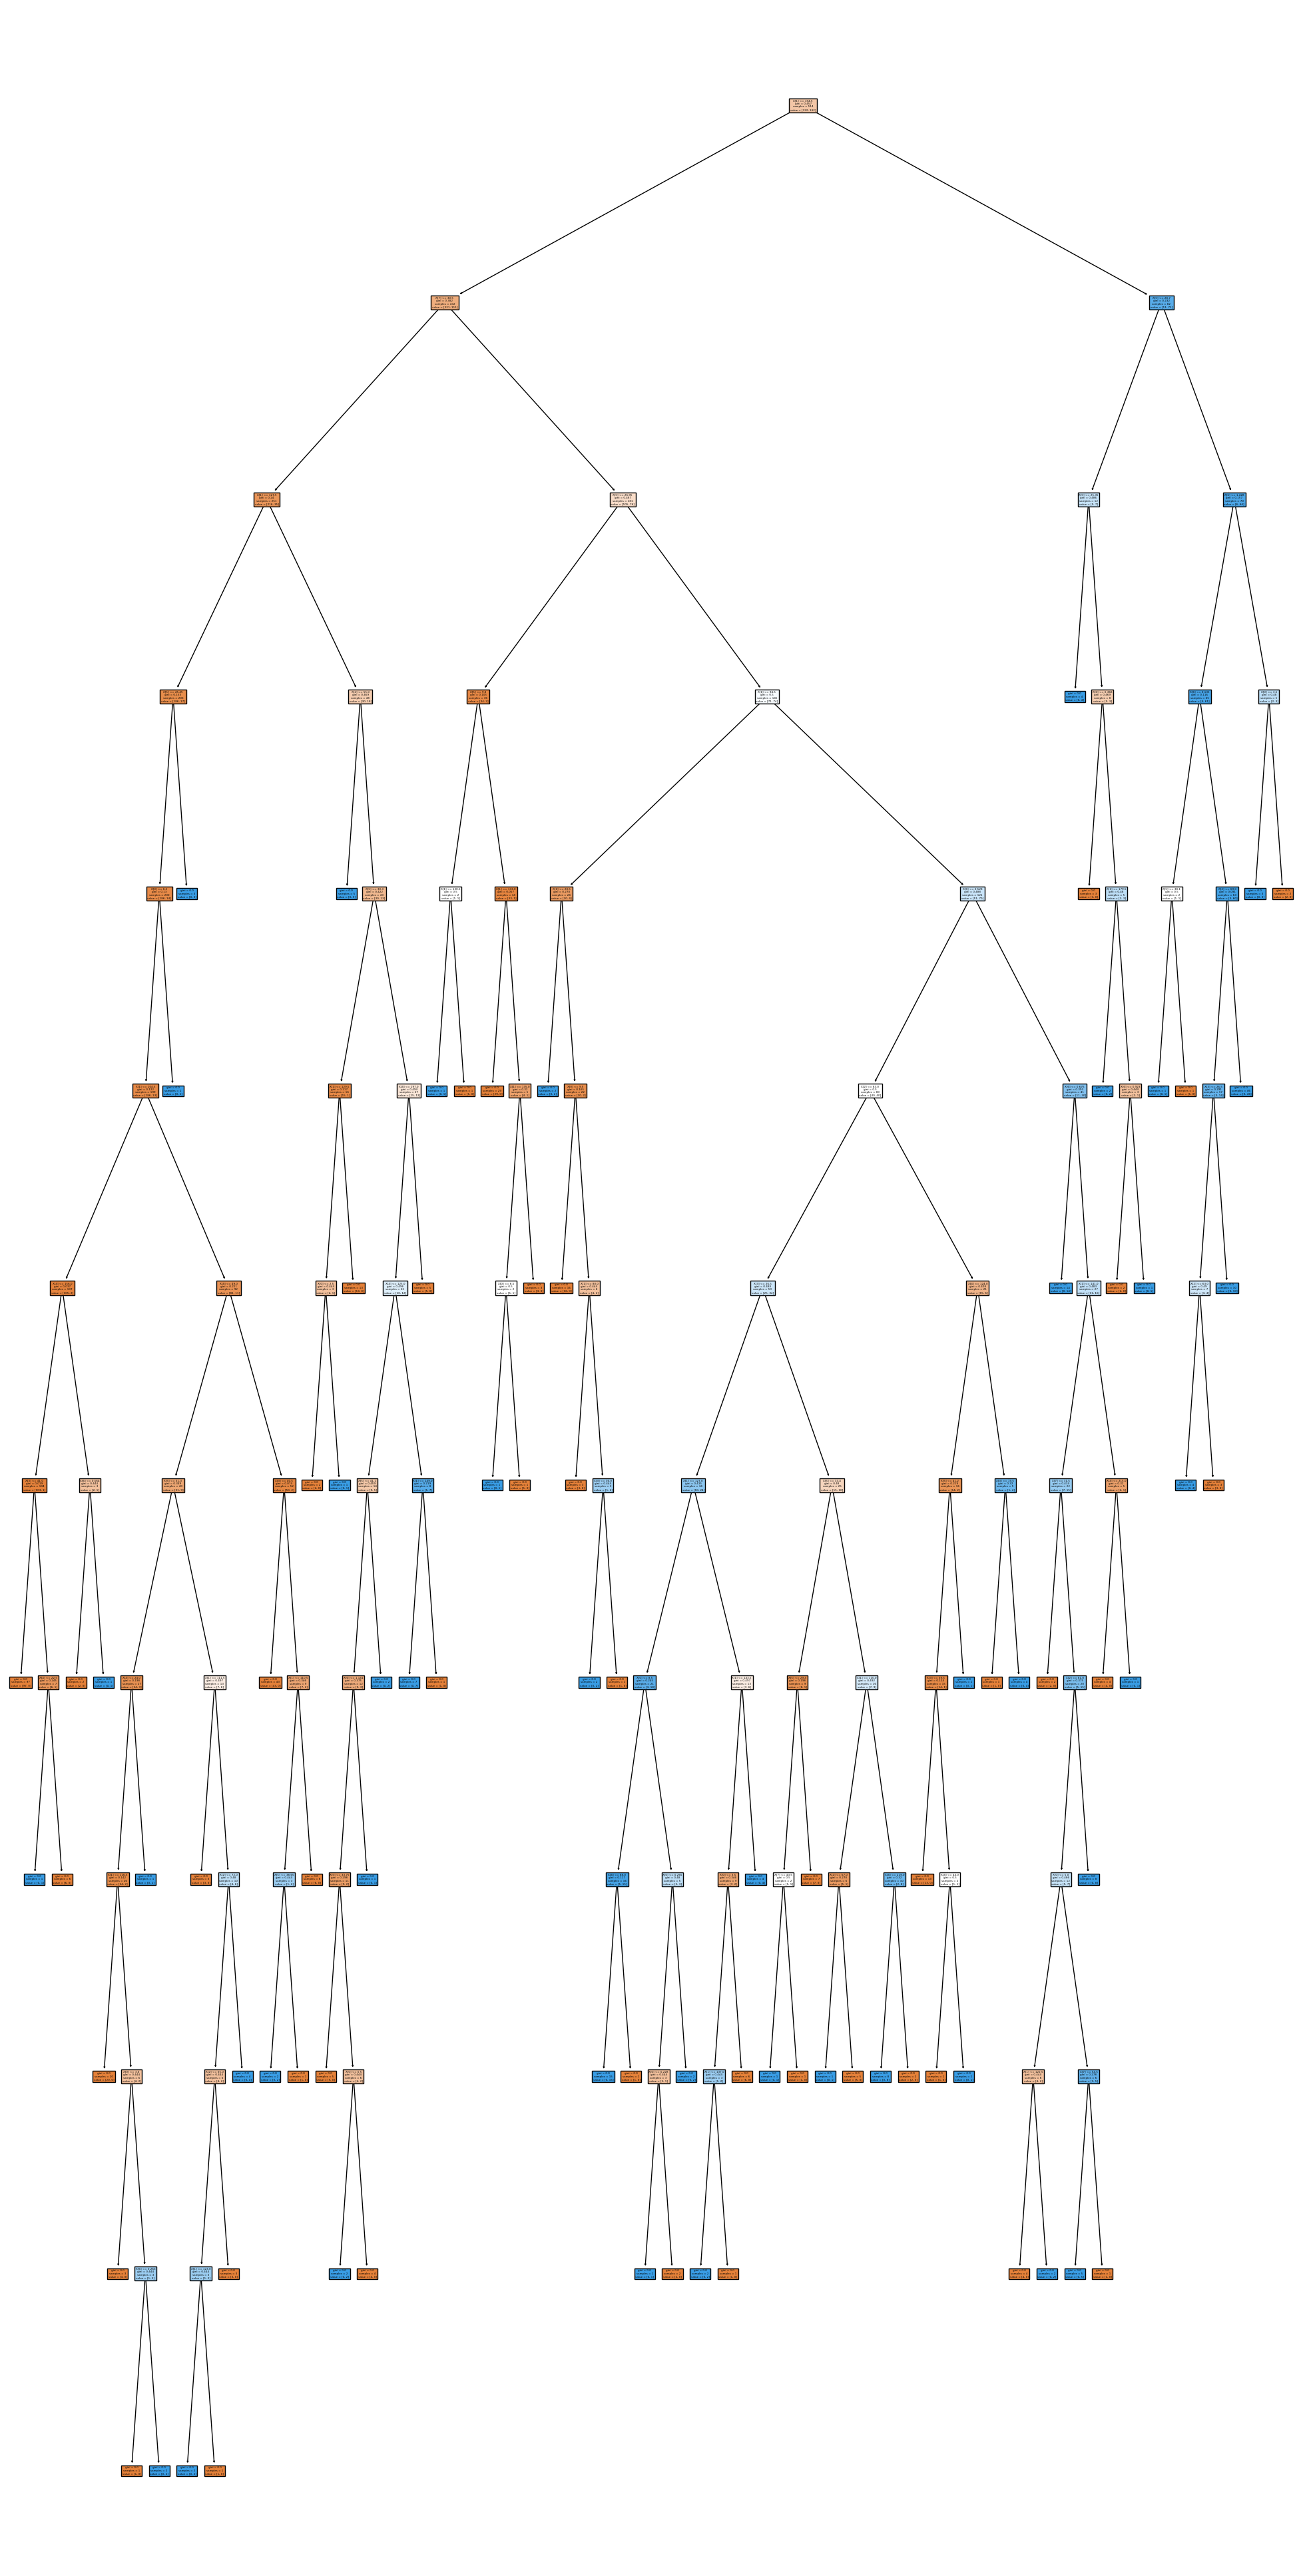

In [48]:
plt.figure(figsize = (25,50))
tree.plot_tree(treeclassifier , filled = True)

### 4. Post Pruning

In [49]:
treeclassifier = DecisionTreeClassifier(criterion='gini' , max_depth=2)
treeclassifier.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'X[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.25, 0.5, 'X[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.487\nsamples = 181\nvalue = [105, 76]'),
 Text(0.75, 0.5, 'X[5] <= 28.7\ngini = 0.232\nsamples = 82\nvalue = [11, 71]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.157\nsamples = 70\nvalue = [6, 64]')]

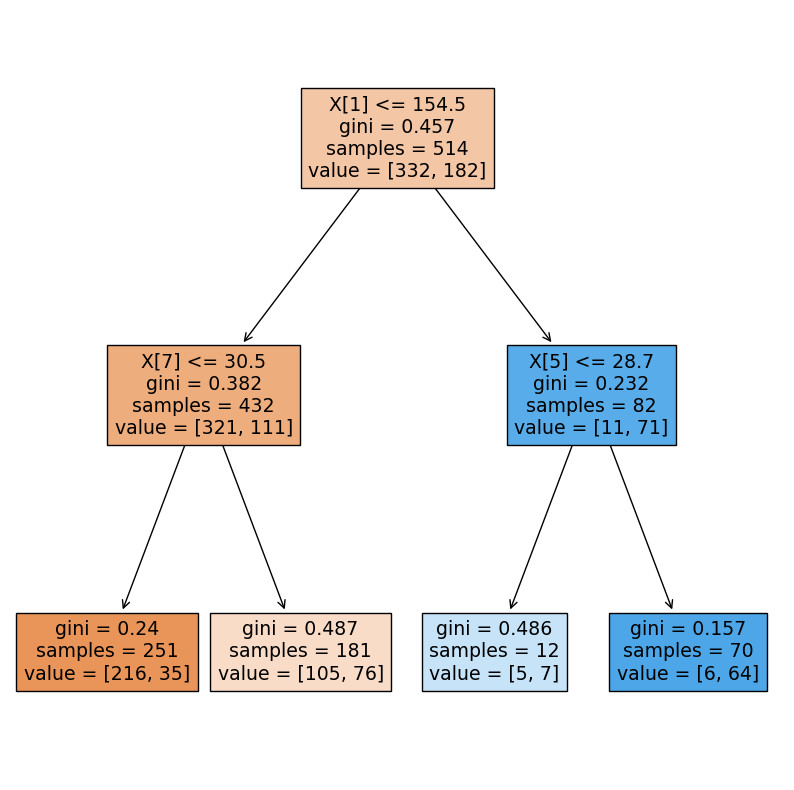

In [53]:
plt.figure(figsize = (10,10))
tree.plot_tree(treeclassifier , filled = True)

### 5. Predictions

In [55]:
y_pred = treeclassifier.predict(X_test)

In [56]:
y_pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [58]:
accuracy_score(y_pred , y_test)

0.7165354330708661

In [60]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       214
           1       0.31      0.68      0.43        40

    accuracy                           0.72       254
   macro avg       0.62      0.70      0.62       254
weighted avg       0.83      0.72      0.75       254



### 6. Prepruning

In [62]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2'] 
}

In [64]:
treeclassifier = DecisionTreeClassifier()
clf = GridSearchCV(treeclassifier , param_grid=parameter , cv = 5 , scoring='accuracy')

In [65]:
clf.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [66]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [67]:
y_pred = clf.predict(X_test)

In [68]:
accuracy_score(y_pred , y_test)

0.7244094488188977

In [69]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       202
           1       0.40      0.65      0.49        52

    accuracy                           0.72       254
   macro avg       0.64      0.70      0.65       254
weighted avg       0.79      0.72      0.75       254

